<a href="https://colab.research.google.com/github/VincentHeau/IA/blob/main/TP1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 - Classification d'espèces à l'aide d'un perceptron

## Introduction

Dans ce TP, nous allons explorer les bases de l'apprentissage machine à l'aide du dataset <a href="https://fr.wikipedia.org/wiki/Iris_de_Fisher">Iris</a>. Ce jeu de données de référence permet de différencier trois espèces d'iris : *Iris setosa*, *Iris virginica* et *Iris versicolor* selon quatre caractéristiques : la longueur et la largeur des sépales et des pétales, en centimètres. Nous disposons de 50 échantillons de chacune des trois espèces.

**Objectif** : classifier le jeu de données Iris avec un perceptron afin de distinguer les espèces les unes des autres par combinaisons de leurs caractéristiques.

**Objectifs pédagogiques** :
- manipuler des bibliothèques python d'apprentissage machine
- explorer un jeu de données
- mettre en oeuvre les méthodes d'apprentissage machine
- se familiariser avec les réseaux de neurones

**Etapes** :
1. Découvrir le jeu de données et le formater
2. Implémenter et évaluer un perceptron
3. Visualiser les résultats

Après import des bibliothèques néccessaires, nous commencerons par explorer le dataset Iris.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Petit point sur la reproductibilité

Afin de pouvoir comparer vos résultats d'un essai à l'autre, ou entre vous, il est intéressant d'avoir un code **reproductible**, c'est-à-dire dont les nombres aléatoires générés et les résultats en résultant sont les mêmes.

Pour cela, nous utilisons la fonction **seed** de la bibliothèque numpy qui permet de contrôler les nombres générés de manière pseudo-aléatoire.

Un ordinateur étant déterministe, c'est-à-dire qu'il met en oeuvre systématiquement une suite d'instructions, est incapable de générer des nombres réellement aléatoires.

C'est pourquoi l'on utilise un algorithme générateur de nombres pseudo-aléatoires qui prend en entrée une graine (un nombre) déterminant la suite d'opérations qui donnera un nombre en sortie.

Définir la graine permet donc d'obtenir les mêmes séquences de nombres aléatoires générées à chaque exécution du programme, et sur n'importe quelle machine.

In [ ]:
# Pour la reproductibilité du code, nous allons fixer :
seed = 11
np.random.seed(seed)

## 1. Le jeu de données Iris

### 1.1 Explorer le jeu de données

**Consignes** :

Explorer le dataset Iris avec la librairie pandas :
- sa structure,
- ses données,
- ses labels,
- sa taille.


In [ ]:
# .... A FAIRE ....
# Tout d'abord, il s'agit d'importer le dataset Iris avec une fonction importée :
from sklearn.datasets import load_iris
iris =

# .... A FAIRE ....
# Préparer les vecteurs de labels et caractéristiques de ce jeu de données :
# - définir X comme les 'data' de iris
# - définir y comme les 'target' de iris
# - définir les labels comme les 'target_names' de iris
# - définir les feature_names comme les 'feature_names' de iris
# Pour cela, regarder à quoi ressemble iris : print(iris)
X =
y =
labels =
feature_names =

# .... A FAIRE ....
# Transformer ces données en une DataFrame de la bibliothèque pandas (tableau) :

# Astuce : si vous avez besoin de vous familiariser avec les DataFrame de pandas :
# https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb

SyntaxError: ignored

#### Solution

In [ ]:
iris = load_iris()
print(iris['data'].shape)

X = iris.data
y = iris.target

labels = iris.target_names
feature_names = iris.feature_names

data = np.hstack((X, y[:, np.newaxis]))

df = pd.DataFrame(data, columns=iris.feature_names+['label'])
df.label = df.label.map({k:v for k,v in enumerate(labels)})
df.tail()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 1.2 Visualisation

A quoi ressemble notre jeu de données ?

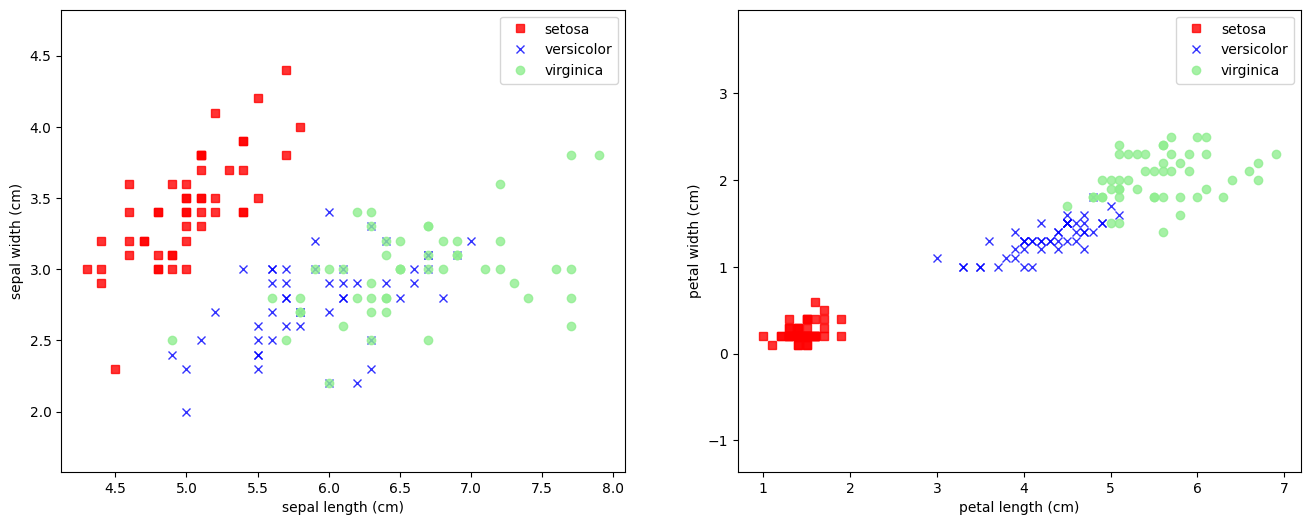

In [ ]:
# setup marker generator and color map
markers = ('s', 'x', 'o')
colors = ['red', 'blue', 'lightgreen']
cmap = ListedColormap(colors[:len(np.unique(y))], name='from_list')

# Visualize the data sets

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(labels):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', alpha=0.8, c=cmap(target),
                    marker=markers[target], label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(labels):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', alpha=0.8, c=cmap(target),
                    marker=markers[target], label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

Qu'observez-vous ?



### 1.3 Pré-traitements
Pour simplifier la classification et sa visualisation, nous n'allons conserver que deux classes en sortie : les *iris setosa* et les *iris versicolor*.

Pour le moment, la sortie attendue de la classification binaire comprend trois éléments : y = [0,1,2] avec les sorties correspondant aux labels = ['setosa' 'versicolor' 'virginica'].

**Consignes** :
- Sélectionner uniquement les *iris setosa* et *versicolor* dans X et y. On va transformer la sortie et attribuer y=-1 pour les *setosa* et y=1 pour les *versicolor*. Pour chaque x<sub>i</sub> appartenant à X on veut un y<sub>i</sub> appartenant à y valant 1 ou -1 (target).

In [ ]:
# .... A FAIRE ....
# Sélectionner les iris setosa et versicolor et changer leur sortie y en -1 et 1
y =

# .... A FAIRE ....
# Extraire les caractéristiques : sepal length et petal length
X =

# Aide : tous les paramètres des iris sont accessibles de cette manière :
# X = df.iloc[0:100, [0, 1, 2, 3]].values

# .... A FAIRE ....
# Afficher la donnée avec matplotlib (utiliser plt.scatter)

SyntaxError: ignored

#### Solution

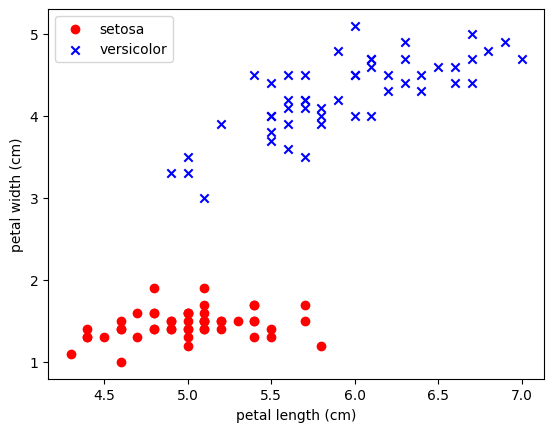

In [ ]:
# Sélectionner les iris setosa et versicolor
filtered_df = df[df.label.isin(['setosa', 'versicolor'])]
y = filtered_df.iloc[:, 4].values
y = np.where(y == 'setosa', -1, 1) # cette condition applique la valeur -1 aux données de label 'setosa' et 1 aux autres

# Extraire les caractéristiques : sepal length et petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.legend(loc='upper left')

plt.show()


### 1.4 Séparation en jeu de données d'entraînement et de test

In [ ]:
# .... A FAIRE ....
# Séparer le jeu de données en jeu d'entraînement et de test
from sklearn.model_selection import train_test_split


#### Solution

In [ ]:
# Séparer le jeu de données en jeu d'entraînement et de test avec une fonction
# déjà implémentée dans sklearn :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
# Vous pouvez séparer vous-même le jeu de données en deux de la manière suivante :
n=int(len(X)*0.8)
X_train = X[:n]
y_train = y[:n]
X_test  = X[n:]
y_test  = y[n:]

## 2. Implémentation d'un modèle de perceptron

Maintenant que nous sommes familiarisés avec le jeu de données Iris, et que nous voyons clairement la délimitation possible entre les types d'iris selon leurs caractéristiques, nous allons entraîner un modèle à apprendre à classifier les données iris selon leurs caractéristiques.

Pour cela, nous allons utiliser un perceptron, modèle que nous avons vu en cours.

### 2.1 Plusieurs implémentations possibles

Il existe un modèle de perceptron déjà implémenté dans sklearn auquel l'on peut donner des données d'apprentissage avec la fonction fit et évaluer ses performances avec la méthode score.

Vous pouvez jouer avec le nombre d'itérations pour voir comment il fonctionne.

In [ ]:
from sklearn import linear_model
model = linear_model.Perceptron(max_iter=10)
model.fit(X_train, y_train) # entraînement du modèle
y_pred = model.predict(X_test) # prédictions du modèle sur les données test
model.score(X_test,y_test) #évaluation du modèle

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
a = accuracy_score(y_true, y_pred)
r = r2_score(y_true, y_pred)
print(a, r)

0.5 0.6


Libre à vous d'explorer la bibliothèque sklearn pour aller plus loin.
Plongeons désormais dans l'implémentation de notre perceptron avec la bibliothèque NumPy pour comprendre un peu mieux son fonctionnement.

In [ ]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    lr : float
        Le taux d'apprentissage, qui contrôle la taille des pas lors de la mise à jour des poids.
    n_iter : int
        Le nombre d'itérations sur le jeu de données d'entraînement pour l'apprentissage.

    Attributes
    -----------
    w_ : 1d-array
        Les poids du modèle après l'apprentissage.
    b_ : float
        Le biais du modèle après l'apprentissage.
    errors_ : list
        Une liste contenant le nombre d'erreurs de classification à chaque itération (époque).

    """
    def __init__(self, lr=0.01, n_iter=10):
        self.lr = lr
        self.n_iter = n_iter

    def net_output(self, X):
        """Calcule la sortie du réseau."""
        return np.dot(X, self.w_) + self.b_  # Calcule la sortie du réseau comme le produit scalaire entre X et les poids, plus le biais.

    def predict(self, X):
        """Renvoie l'étiquette de classe."""
        return np.where(self.net_output(X) >= 0.0, 1, -1)  # Prédiction de la classe par un simple seuil.

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Les données d'entraînement X, où n_samples est le nombre d'échantillons
            et n_features est le nombre de caractéristiques.
        y : array-like, shape = [n_samples]
            Target values. Les valeurs cibles correspondant aux échantillons dans X.

        Returns
        -------
        self : object
        Retourne l'objet perceptron lui-même après l'apprentissage.

        """
        self.w_ = np.zeros(X.shape[1])  # Initialise les poids à zéro.
        self.b_ = 0  # Initialise le biais à zéro.
        self.errors_ = []  # Initialise la liste des erreurs.

        for _ in range(self.n_iter):  # Répète l'apprentissage pour n_iter époques.
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))  # Calcule la mise à jour des poids.
                self.w_ += update * xi  # Met à jour les poids.
                self.b_ += update  # Met à jour le biais.
                errors += int(update != 0.0)  # Incrémente le compteur d'erreurs si la prédiction est incorrecte.
            self.errors_.append(errors)  # Ajoute le nombre d'erreurs de cette époque à la liste.

Prenez le temps de comprendre le code ci-dessus et les différentes fonctions qui le composent.

**Remarque** : dans la fonction *predict*, nous avons implémenté une simple fonction seuil mais bien d'autres fonctions d'activation sont possibles comme vu en cours. Vous pouvez vous amusez à implémenter d'autres fonctions d'activation.

### 2.2 Entraîner et évaluer le réseau de neurones
Nous allons utiliser le modèle de perceptron défini ci-dessus pour effectuer une classification binaire sur le jeu de données Iris.

**Consignes** :
- Implémenter le mlp
- Évaluer les performances du modèle en calculant le taux de classification correcte.


In [ ]:
# .... A FAIRE ....
# Définir une instance de notre classe Perceptron
model =

# Puis entraîner le modèle

# Bonus : afficher les erreurs en fonction des époques

#### Solution

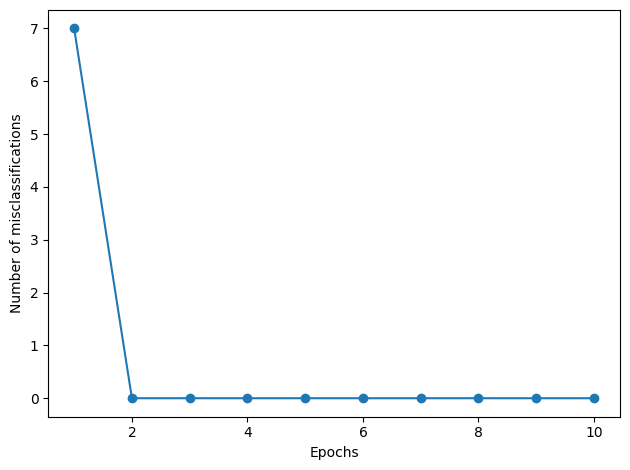

In [ ]:
model = Perceptron(lr=0.1, n_iter=10)
model.fit(X_train, y_train)

plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


### Pour aller plus loin

- Expérimenter avec différents taux d'apprentissage et nombres d'itérations pour voir comment ils affectent les performances du perceptron.
- Expérimenter avec 1 seule caractéristique des iris, 2, 3 et 4 en entréee du perceptron
- Expérimenter en modifiant le learning rate.


## 3. Visualisation des résultats

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o')
    colors = ['red', 'blue', 'lightgreen']
    cmap = ListedColormap(colors[:len(np.unique(y))], name='from_list')

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

<ipython-input-11-508cc7bb641e>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


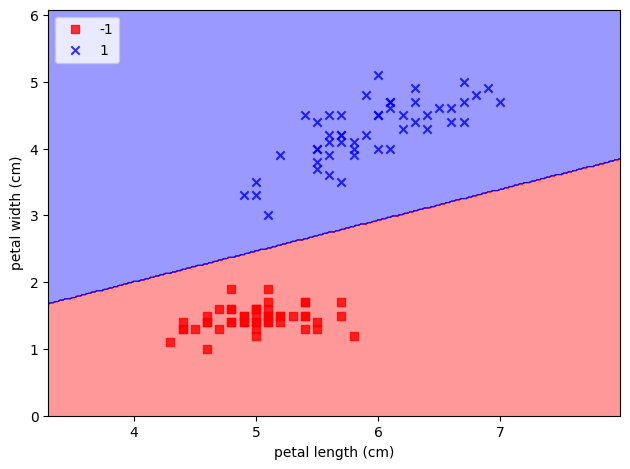

In [ ]:
plot_decision_regions(X, y, classifier=model)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Cependant, le perceptron a des limites, notamment pour les problèmes de classification non linéaires. C'est là que le MLP entre en jeu dans le prochain TP.